Task 2: 
- Identify the most common combinations of cuisines in the dataset.
- Determine if certain cuisine combinations tend to have higher ratings.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load the data
df = pd.read_csv('/Users/tilakpatel/Personel/Cognifyz intern/code/Data/Dataset.csv', encoding='utf-8')
df = df.dropna(subset=['Cuisines'])


In [3]:
df_pairs = df.copy()
df_pairs = df_pairs.dropna(subset=['Cuisines'])

In [4]:
from itertools import combinations
from collections import Counter

pair_counts = Counter()

for row in df_pairs['Cuisines']:
    row_list = row.split(',')
    pair_counts.update(Counter(combinations(row_list, 2)))

In [5]:
df_pair_counts = pd.DataFrame(pair_counts.items(), columns=['Cuisine_Pair', 'Count']).sort_values(by='Count', ascending=False)

In [6]:
df_pair_counts

,Cuisine_Pair,Count
505,"(North Indian, Chinese)",1314
504,"(North Indian, Mughlai)",689
528,"(North Indian, Fast Food)",296
558,"(North Indian, South Indian)",258
648,"(Bakery, Desserts)",254
...,...,...
1123,"( Healthy Food, Bakery)",1
1110,"(Asian, Fast Food)",1
1109,"(Healthy Food, Bakery)",1
1107,"(Healthy Food, Cafe)",1


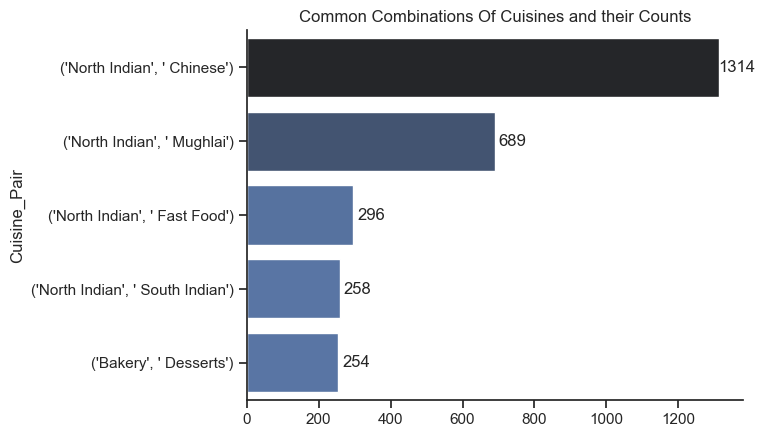

In [7]:
df_cuisine_pair_plot = df_pair_counts.head().copy()
df_cuisine_pair_plot['Cuisine_Pair'] = df_cuisine_pair_plot['Cuisine_Pair'].astype(str)
sns.set_theme(style='ticks')
sns.barplot(data=df_cuisine_pair_plot, x='Count', y='Cuisine_Pair', hue='Count', palette='dark:b_r', legend=False)
plt.title('Common Combinations Of Cuisines and their Counts')
plt.xlabel('')
for idx, value in enumerate(df_cuisine_pair_plot['Count']):
    plt.text(value+50, idx, value, ha='center', va='center')
sns.despine()
plt.show()